In [9]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import os
from PIL import Image
from sklearn.cluster import AgglomerativeClustering

#### 1. Загрузите данные ex6data1.mat из файла.

In [10]:
data2 = scio.loadmat('data/Lab 7/ex7data1.mat')
X = data2['X']

#### 2. Реализуйте функцию случайной инициализации K центров кластеров.

In [11]:
def kMeansInitCentroids(X, K):
    randix = np.random.permutation(np.size(X, 0))
    centroids = X[randix[:K], :]
    return centroids

#### 3. Реализуйте функцию определения принадлежности к кластерам.

In [12]:
def findClosestCentroids(X, center):
    K = np.size(center, 0)
    m = np.size(X, 0)
    idx = np.zeros((m, 1), dtype=int)
    K_temp = np.zeros((K,), dtype=float)
    for i in range(m):
        for j in range(K):
            K_temp[j] = np.sum(np.square(X[i, :] - center[j, :]))
        idx[i] = np.argmin(K_temp)
    return idx

#### 4. Реализуйте функцию пересчета центров кластеров.

In [13]:
def computeCentroids(X, idx, K):
    m, n = np.shape(X)
    centroids = np.zeros((K, n), dtype=float)
    
    for i in range(K):
        centroids[i, :] = (X.T @ (idx == i) / np.sum(idx == i)).reshape(-1)
    
    return centroids

#### 5. Реализуйте алгоритм K-средних.

In [14]:
def drawLine(p1, p2):
    x = np.array([p1[0], p2[0]])
    y = np.array([p1[1], p2[1]])
    plt.plot(x, y)
    

In [15]:
def plotDataPoints(X, idx, K):
    colors = ['red', 'green', 'blue']
    plt.scatter(X[:, 0], X[:, 1], cmap=pltcolor.ListedColormap(colors), s=40)
    

In [16]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    plotDataPoints(X, idx, K)
    plt.plot(centroids[:, 0], centroids[:, 1], 'x',
             MarkerEdgeColor='k', ms=10,
             LineWidth=3)
    for j in range(np.size(centroids, 0)):
        drawLine(centroids[j, :], previous[j, :])
    plt.title('Iteration number %d' % (i + 1))
    

In [17]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = np.shape(X)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1), dtype=float)

    if plot_progress:
        plt.ion()
        fig = plt.figure()

    for i in range(max_iters):
        print('K-Means iteration %d/%d...\n' % (i + 1, max_iters))
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            fig.canvas.draw()
        centroids = computeCentroids(X, idx, K)
    plt.show(block=True)
    plt.ioff()
    
    return centroids, idx

#### 6. Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), а также траекторию движения центров кластеров в процессе работы алгоритма

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



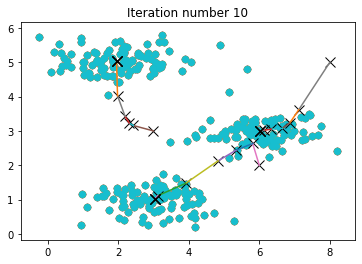

In [18]:
max_iters = 10
initial_centroids = np.array([3, 3, 6, 2, 8, 5]).reshape(3, 2)
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

#### 7. Загрузите данные bird_small.mat из файла.
    

In [19]:
A = scio.loadmat('data/Lab 6/bird_small.mat')['A']
A = A / 255
img_size = np.shape(A)
X = A.reshape(img_size[0] * img_size[1], 3)

#### 8. С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.

In [20]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)
print(centroids)

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...

[[0.52402963 0.39631482 0.24397729]
 [0.96419446 0.91034566 0.76314938]
 [0.40533508 0.28585546 0.193733  ]
 [0.05498698 0.06050268 0.05135236]
 [0.22791954 0.21470694 0.20762785]
 [0.54425153 0.48288849 0.47085774]
 [0.15085953 0.1563721  0.14820066]
 [0.08408641 0.09119033 0.08029051]
 [0.68392809 0.51172669 0.26304202]
 [0.06844972 0.07422887 0.06393762]
 [0.76971406 0.68407497 0.63866674]
 [0.10839795 0.1167063  0.10676453]
 [0.54153298 0.63720397 0.76737968]
 [0.88241557 0.73900406 0.47828453]
 [0.82618878 0.61434469 0.33251303]
 [0.31954565 0.32123474 0.35599856]]


In [21]:
def idxToX(idx, centroids):
    X = np.array([])
    
    for index in idx:
        X = np.append(X, centroids[index]) 
    
    return X.reshape(-1, 3)

#### 9. Насколько уменьшился размер изображения? Как это сказалось на качестве?

Первоначальный резмер изображения был 393,215 бит, после сжатия 65,920 бит, что в шесть раз меньше. 
Качество картинки соответственно заметно ухудшилось.

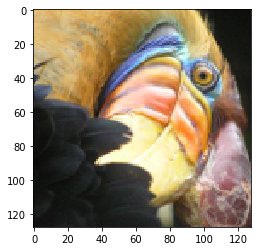

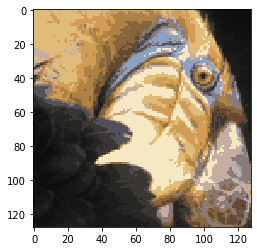

In [22]:
plt.imshow(X.reshape(128, 128, 3), interpolation='nearest')
plt.show()

plt.imshow(idxToX(idx, centroids).reshape(128, 128, 3), interpolation='nearest')
plt.show()

#### 10. Реализуйте алгоритм K-средних на другом изображении.

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...

[[0.76420761 0.78582388 0.7321034 ]
 [0.7124581  0.68848582 0.51967775]
 [0.91455435 0.86468709 0.6321524 ]
 [0.51151906 0.57501052 0.58170201]
 [0.26324615 0.31147077 0.34238716]
 [0.06754418 0.49372896 0.02433994]
 [0.61821201 0.67461915 0.68851046]
 [0.04284635 0.32725732 0.0159983 ]
 [0.47383629 0.52318207 0.09931777]
 [0.04036976 0.13019081 0.03167292]
 [0.17876787 0.21979653 0.20549466]
 [0.40899728 0.46700787 0.4568191 ]
 [0.93574057 0.92292919 0.82126534]
 [0.27131415 0.76926073 0.03821573]
 [0.13266601 0.65499206 0.02407122]
 [0.85021161 0.76314442 0.3155598 ]]


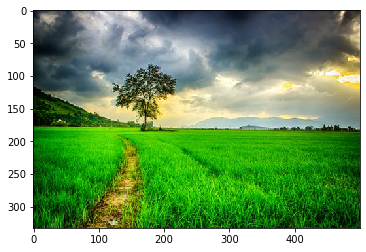

In [23]:
A = np.array(Image.open('data/Lab 6/pexels-photo-236047.jpeg'))
plt.imshow(A, interpolation='nearest')
A = A / 255
img_size = np.shape(A)
X = A.reshape(img_size[0] * img_size[1], 3)

K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)
print(centroids)

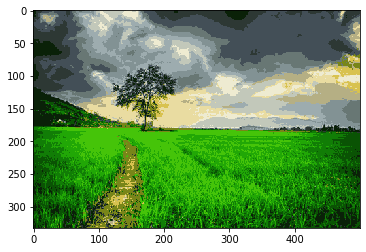

In [24]:
plt.imshow(idxToX(idx, centroids).reshape(img_size[0], img_size[1], 3), interpolation='nearest')
plt.show()

#### 11. Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.

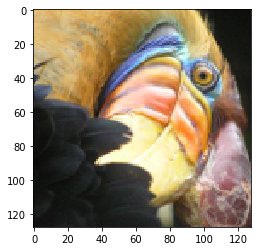

In [25]:
A = scio.loadmat('data/Lab 6/bird_small.mat')['A']
plt.imshow(A, interpolation='nearest')
A = A / 255
img_size = np.shape(A)
X = A.reshape(img_size[0] * img_size[1], 3)

model = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

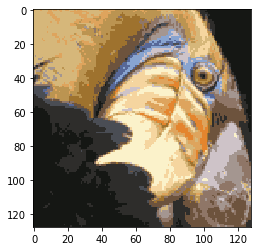

In [26]:
centroids = computeCentroids(X, labels, 16)
plt.imshow(idxToX(labels, centroids).reshape(img_size[0], img_size[1], 3), interpolation='nearest')
plt.show()

Визуально результат получился точно таким же. 

Алгоритм иерархической кластреизации работал заметно дольше. 
Это объясняется тем, что временная сложность алгоритма линейна для метода k-средних (O(n)) и квадратична для метода иерархической кластеризации (O(n2))